<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Aranzazú Rendón Gómez, Diego Pintor.
    
**Fecha:** 16 de marzo del 2021.

**Expediente:** 722272, .
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 8: Clase 14

## Enunciado Tarea

# <font color = red> Tarea
**Esta tarea incluye el ejercicio dejado en la clase anterior**
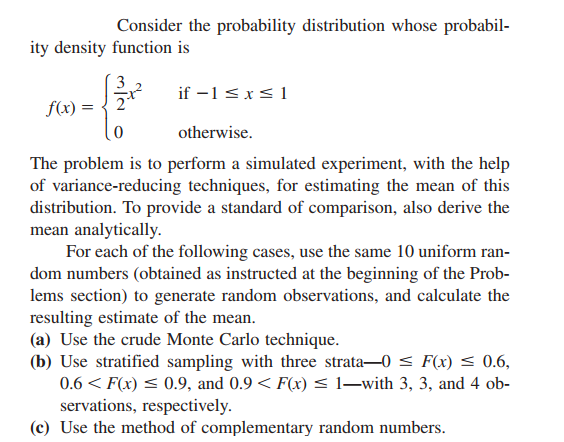
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

### Respuesta Pintor

### Respuesta Aranzazú